## S&P Global - CORE2LOG: AUTOMATIC ROCK CLASSIFICATION
### Misael M. Morales, Oriyomi Raheem, Carlos Torres-Verdin, and Michael Pyrcz, UT-Austin; Murray Christie, Vladimir Rabinovich, S&P Global
#### 2024, Digital Reservoir Characterization Technology (DiReCT)
***

In [ ]:
from auto_rock_classification import *

In [ ]:
# RUN PROCESSING
# this module will load the Core data for all wells, and do:
# (1) filter the wells based on the minimum number of core points specified
# (2) apply a clustering technique to estimate the rock classes along the well
# (3) save the results of the predicted classes in a csv file for all wells
RockClassification(minpts=30, method='gmm', n_classes=3).run_processing()

In [ ]:
# RUN DASHBOARD
# this module will load the Core2Log Rock Classification dashboard:
# (1) specify the well to analyze
# (2) specify the rock classification technique to use
#   (2a) if the technique is physics-based: specify cutoffs
#   (2b) if the technique is ML-based: specify the number of classes
# (3) run the dashboard to visualize results
RockClassification(minpts=30, well_number=1104, method='birch', n_classes=3).run_dashboard(maketitle=False)

In [ ]:
# COMPARISON
# compare all techniques for a given well (user must define cutoffs and n_classes accordingly)
RockClassification(minpts=30, well_number=1104).run_comparison(n_classes=3, 
                                                    leverett_cutoffs=[10,20,40], 
                                                    winland_cutoffs=[150,300,500], 
                                                    lorenz_cutoffs=[0.5,2,5])

***
# END

In [1]:
from auto_rock_classification import *

arc = RockClassification(minpts=30, well_number=1104, method='birch', n_classes=3)
arc.bigloader()
arc.preprocessing()

All data shape: (102797, 88)
Total number of wells: 1379
--------------------------------------------------------------------------------
                Automatic Core2Log Rock Classification Dashboard
--------------------------------------------------------------------------------
Well #1104 | UWI: 42702401710000 | LAT: 29.29 | LONG: -88.64
Method: BIRCH | Number of Classes: 3 | Cutoffs: None
Well shape: (223, 5)
--------------------------------------------------------------------------------


In [26]:
x, y, p = [], [], []
for f in os.listdir('Data/UT Export core classification'):
    d = pd.read_csv('Data/UT Export core classification/{}'.format(f))
    c = d['CLASS']
    u = np.unique(c)
    x.append(d['SURFACE_LONGITUDE'].values[0])
    y.append(d['SURFACE_LATITUDE'].values[0])
    p.append(len(np.argwhere(c == u[-1]))/len(c))

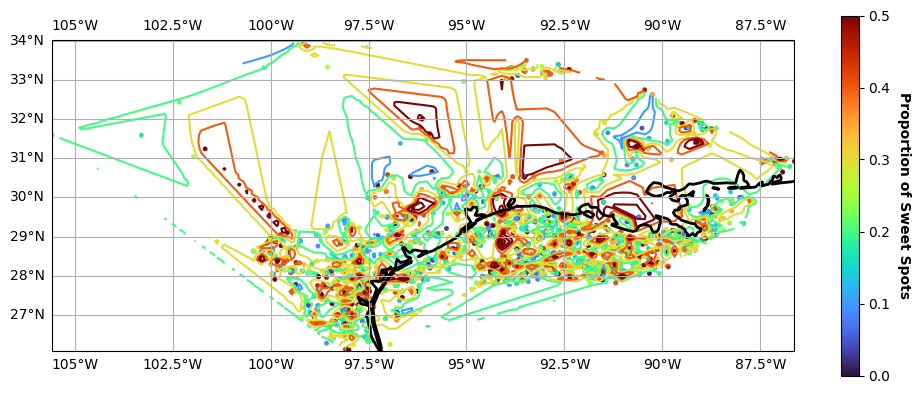

In [84]:
gx, gy = np.meshgrid(np.linspace(min(x), max(x), 100), np.linspace(min(y), max(y), 100))
gp = griddata((x, y), p, (gx, gy), method='linear')
cmap3 = 'turbo'
vmin, vmax = 0, 0.5

fig = plt.figure(figsize=(10,7.5))
ax = fig.add_subplot(111, projection=arc.plate)
ax.contour(gx, gy, gp, cmap=cmap3, vmin=vmin, vmax=vmax)
im1 = ax.scatter(x, y, c=p, s=arc.s1, cmap=cmap3, lw=0.25, vmin=vmin, vmax=vmax)
#ax.scatter(arc.longi, arc.lati, s=arc.s1, transform=arc.plate, zorder=2)
ax.coastlines(resolution='50m', color='black', lw=2, zorder=2)
cb = plt.colorbar(im1, shrink=0.5)
cb.set_label('Proportion of Sweet Spots', weight='bold', rotation=270, labelpad=15)
gl = ax.gridlines(draw_labels=True)
gl.right_labels = False
gl.xformatter, gl.yformatter = LONGITUDE_FORMATTER, LATITUDE_FORMATTER
plt.tight_layout()
plt.show()